# Solutions 5 - Examples in Data Clustering

---

## Assignment 1

## Assignment 2

The letters are written in the file `files/Indore.jpg`. First, preprocessing is needed.

In [2]:
using Images, Colors

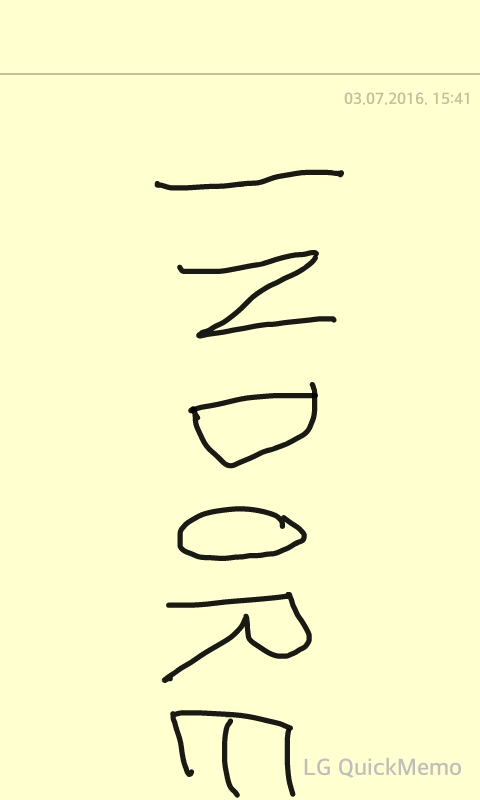

In [3]:
img=load("files/Indore.jpg")

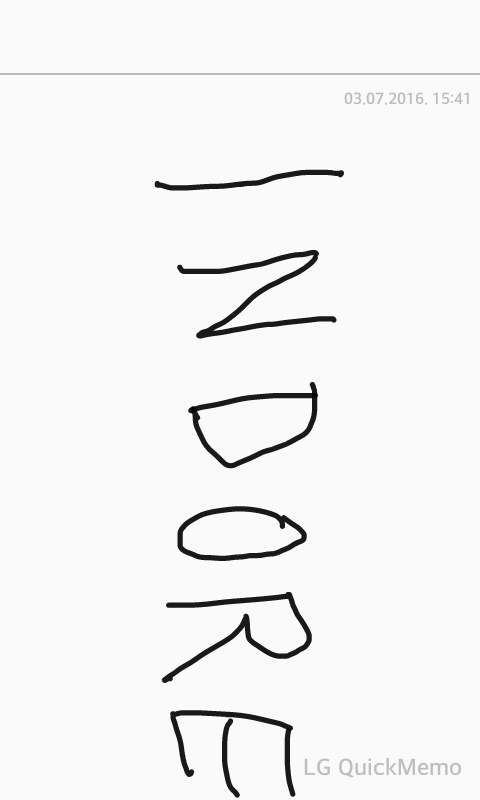

In [4]:
img=map(Gray,img)

In [11]:
# Extract the matrix
A=float(img)

800×480 Array{Float64,2}:
 0.980392  0.980392  0.980392  0.980392  …  0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392  …  0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392  …  0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 ⋮                       

In [12]:
sort(A[:])

384000-element Array{Float64,1}:
 0.00784314
 0.00784314
 0.00784314
 0.00784314
 0.00784314
 0.00784314
 0.0117647 
 0.0117647 
 0.0117647 
 0.0117647 
 0.0117647 
 0.0117647 
 0.0117647 
 ⋮         
 0.984314  
 0.984314  
 0.984314  
 0.984314  
 0.984314  
 0.984314  
 0.984314  
 0.984314  
 0.984314  
 0.984314  
 0.984314  
 0.984314  

In [13]:
# Truncate small elements (0 is black, 1 is white)
A[A.>0.2]=0

0

In [14]:
sum(A.>0), prod(size(A))

(8780, 384000)

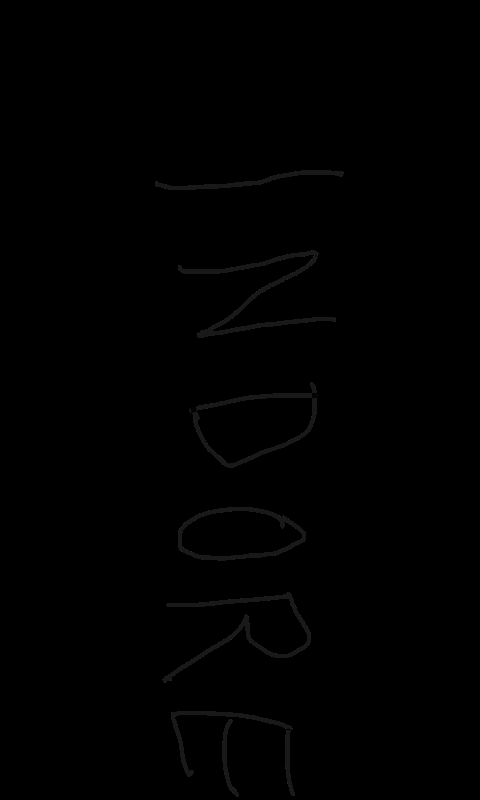

In [15]:
colorview(Gray,A)

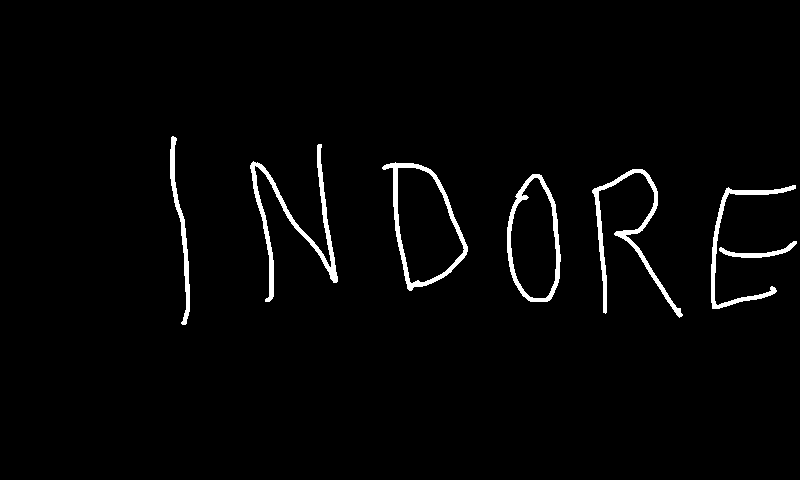

In [16]:
# Increase the contrast for clustering
A[A.>0]=1
colorview(Gray,rotl90(A))

In [17]:
# Create the data points from letters
X=Array{Int}(2,sum(A.==1));

In [18]:
ind=find(A.==1)
for i=1:length(ind)
    X[:,i]=collect(ind2sub(A,ind[i]))
end
X=map(Float64,X)

2×8780 Array{Float64,2}:
 183.0  184.0  185.0  186.0  182.0  …  174.0  175.0  176.0  173.0  174.0
 156.0  156.0  156.0  156.0  157.0     343.0  343.0  343.0  344.0  344.0

In [19]:
# Solve it
using Clustering

In [26]:
out=kmeans(X,6)

Clustering.KmeansResult{Float64}([516.069 229.173 … 749.32 371.813; 240.269 256.206 … 257.773 260.324], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [12173.1, 12081.7, 11992.4, 11905.0, 12067.0, 11973.7, 11882.3, 11793.0, 11705.6, 11620.3  …  10295.3, 10188.0, 10082.6, 10802.0, 10688.6, 10577.3, 10467.9, 10360.6, 10863.2, 10751.9], [1734, 1901, 768, 1438, 964, 1975], [1734.0, 1901.0, 768.0, 1438.0, 964.0, 1975.0], 2.545921502588616e7, 16, true)

For plotting we use the function from the 
[K-means Algorithm](L09 K-means Algorithm.ipynb) notebook.

In [21]:
# Color it
function plotKmeansresult(out::KmeansResult,X::Array)
    p=FramedPlot()
    # Custers
    k=size(out.centers,2)
    for j=1:k
        # Random color
        col=RGB(rand(),rand(),rand())
        p1=Points(X[1,find(out.assignments.==j)],
        X[2,find(out.assignments.==j)],"color",col,symbolkind="dot")
        add(p,p1)
    end
    # Means
    p2=Points(out.centers[1,:],out.centers[2,:],
    color="red",symbolkind="plus")
    add(p,p2)
end

plotKmeansresult (generic function with 1 method)

In [22]:
using Winston

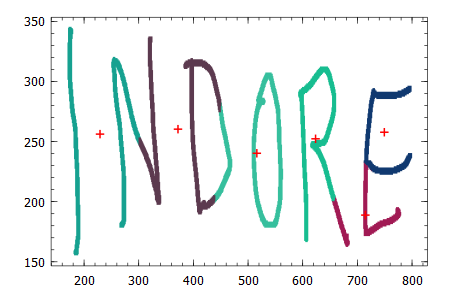

In [27]:
plotKmeansresult(out,X)

Now we try the spectral $k$-partitioning. We:

* form the Laplacian matrix, 
* compute eigenvectors corresponding to $k$ smallest eigenvalues, and
* cluster those vectors with $k$-means algorithm.

In [28]:
function plotKpartresult(C::Vector,X::Array)
    p=FramedPlot()
    for j=1:k
        # Random color
        col=RGB(rand(),rand(),rand())
        p1=Points(X[1,find(C.==j)],
        X[2,find(C.==j)],"color",col,symbolkind="dot")
        add(p,p1)
    end
    p
end

plotKpartresult (generic function with 1 method)

In [29]:
# Now some functions
function my_weight_matrix(src::Array,dst::Array,weights::Array)
    n=nv(G)
    sparse([src;dst],[dst;src],[weights;weights],n,n)
end

my_laplacian(W::AbstractMatrix)=sparse(diagm(vec(sum(W,2))))-W

function my_normalized_laplacian(L::AbstractMatrix)
    D=1.0./sqrt.(diag(L))
    n=length(D)
    [L[i,j]*(D[i]*D[j]) for i=1:n, j=1:n]
end

my_normalized_laplacian (generic function with 1 method)

In [30]:
using Distances
S=pairwise(SqEuclidean(),X)
# S=pairwise(Cityblock(),X)
β=1

1

In [31]:
# Weight matrix
W=exp.(-β*S)
# Sum of weights
D=vec(sum(W,2))
# Laplacian matrix
L=my_laplacian(W)
# Normalized Laplacian matrix
Ln=my_normalized_laplacian(L)

8780×8780 Array{Float64,2}:
  1.0          -0.297331     -0.0148032    …   0.0           0.0        
 -0.297331      1.0          -0.25568          0.0           0.0        
 -0.0148032    -0.25568       1.0              0.0           0.0        
 -0.000115989  -0.0148029    -0.297324         0.0           0.0        
 -0.128317     -0.00549362   -3.70157e-5       0.0           0.0        
 -0.256394     -0.0811091    -0.00403818   …   0.0           0.0        
 -0.0904931    -0.211528     -0.0778166        0.0           0.0        
 -0.00450498   -0.0778096    -0.211508         0.0           0.0        
 -3.15852e-5   -0.004031     -0.0809647        0.0           0.0        
 -3.89101e-8   -3.66928e-5   -0.00544569       0.0           0.0        
 -0.00638751   -0.000273467  -1.8426e-6    …   0.0           0.0        
 -0.0127418    -0.00403082   -0.000200683      0.0           0.0        
 -0.00447838   -0.0104682    -0.00385103       0.0           0.0        
  ⋮                    

λ = [3.5288e-16, 3.95239e-16, 4.13673e-16, 4.17679e-16, 4.23952e-16, 4.23954e-16]


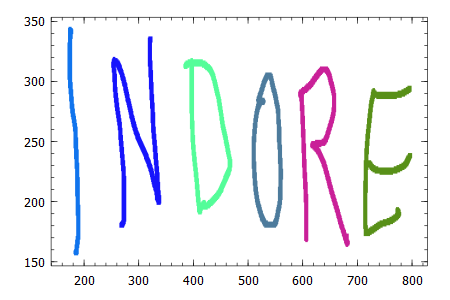

In [32]:
# Normalized Laplacian
k=6
m=size(L,1)
λ,Y=eigs(Ln,nev=k,which=:SM, v0=ones(m))
@show λ
Y=diagm(1.0./sqrt.(D))*Y
out=kmeans(Y',k)
plotKpartresult(out.assignments,X)